500Cities_City_11082016.ZIP   CityBoundaries.cpg  CityBoundaries.sbx	  mnist_test.csv
anscombe.json		      CityBoundaries.dbf  CityBoundaries.shp	  mnist_train_small.csv
california_housing_test.csv   CityBoundaries.prj  CityBoundaries.shp.xml  README.md
california_housing_train.csv  CityBoundaries.sbn  CityBoundaries.shx
/content


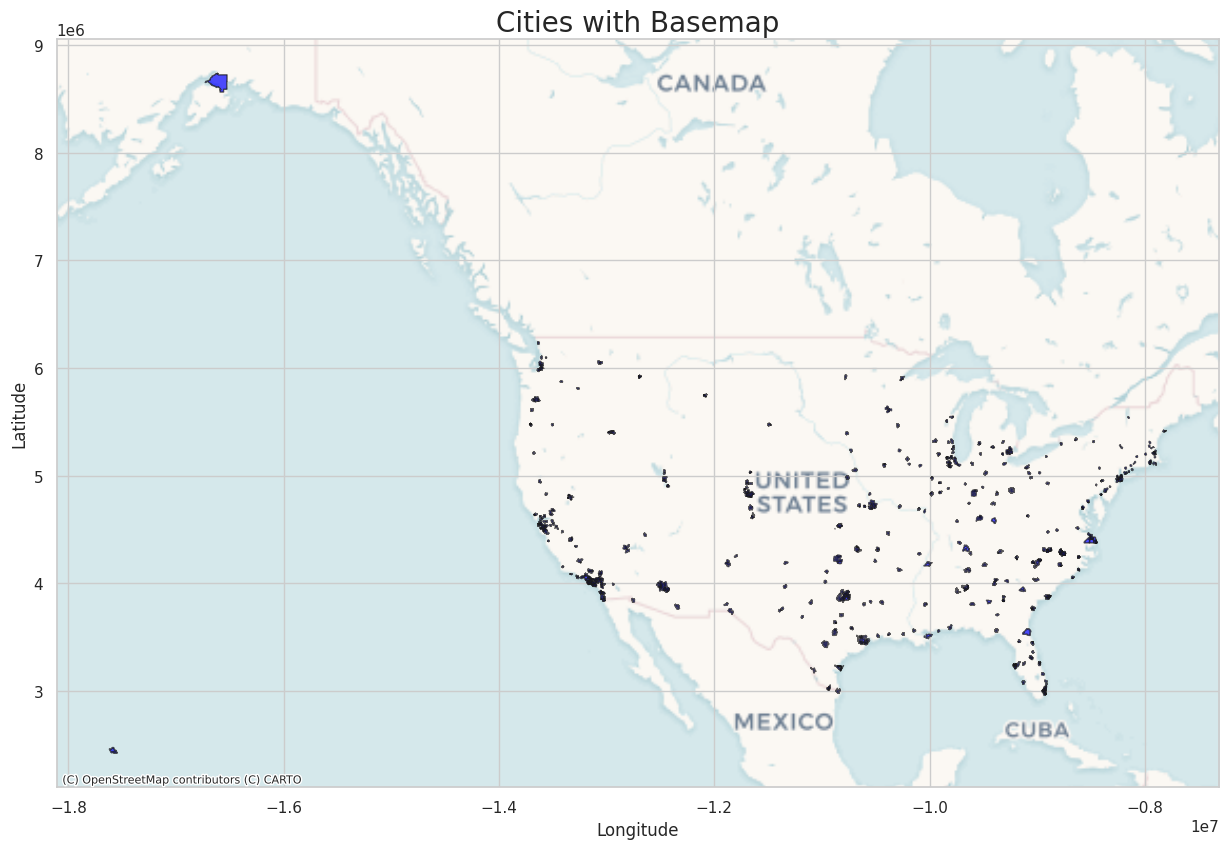

In [5]:
#!pip install contextily
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import os
import zipfile

# Verify the file exists (run this in a separate code cell)
!ls /content/sample_data



# Extract the zipped shapefile
data_path = "/content/sample_data/500Cities_City_11082016.ZIP"  # Adjust the path if necessary
working_path = os.getcwd()
print(working_path)

# Check if the file exists before attempting to extract
if os.path.exists(data_path):
    with zipfile.ZipFile(data_path, "r") as zip_ref:
        zip_ref.extractall("/content/sample_data")
else:
    print(f"File not found at: {data_path}")

# Load the extracted shapefile
city_data = gpd.read_file("/content/sample_data/CityBoundaries.shp")

# Set the coordinate reference system to WGS84 (EPSG:4326) if not already set
if city_data.crs != 'EPSG:3857':
  city_data = city_data.to_crs('EPSG:3857')

 # Plot the data using GeoPandas
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
city_data.plot(ax=ax, marker='o', color='blue', markersize=15, alpha=0.7, edgecolor='k')

# Add a basemap from contextily
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Voyager)

# Customize the plot with Seaborn
sns.set_theme()
sns.set_style("whitegrid")
plt.title("Cities with Basemap", fontsize=20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()